In [5]:
pwd

'e:\\git_download\\Chemical-informatics\\jupyter'

## 1. import libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit import Chem, DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import Draw

# All we need for clustering
from scipy.cluster.hierarchy import dendrogram, linkage

## 2.Loading and visualizing the molecules

In [4]:
# The result of this code will be:
working_library=[]
with open(r'E:\git_download\Chemical-informatics\data\Enamine_REAL_amino_acids_cxsmiles.cxsmiles','r') as file:
    for index,line in enumerate(file):
        if 0<index<=1: # Kee the fist smile code as example
            print (index, line.split())

1 ['CC(OC1=CC=C(CNC(C)C2(C)CC2)C=C1)C(=O)O', 'Z3347701932']


The result of the above cell is a list which first element (0) is the SMILES codes of the molecule, and the second element (1), the name.

In [6]:
working_library=[]
with open(r'E:\git_download\Chemical-informatics\data\Enamine_REAL_amino_acids_cxsmiles.cxsmiles','r') as file:
    for index,line in enumerate(file):
        if 0<index<=100: # Molecules we want (0 is omitted because the fist line (0) of file is the header, not SMILES code)
            mol=Chem.MolFromSmiles(line.split()[0]) # Converting SMILES codes into rdkit mol 
            mol.SetProp('_Name',line.split()[1]) # Adding the name for each molecule
            working_library.append(mol)

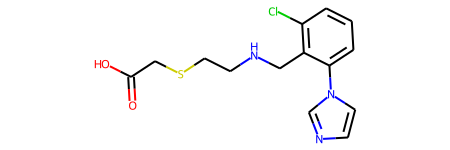

In [7]:
mol

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\rdkit\Chem\Draw\IPythonConsole.py:190: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


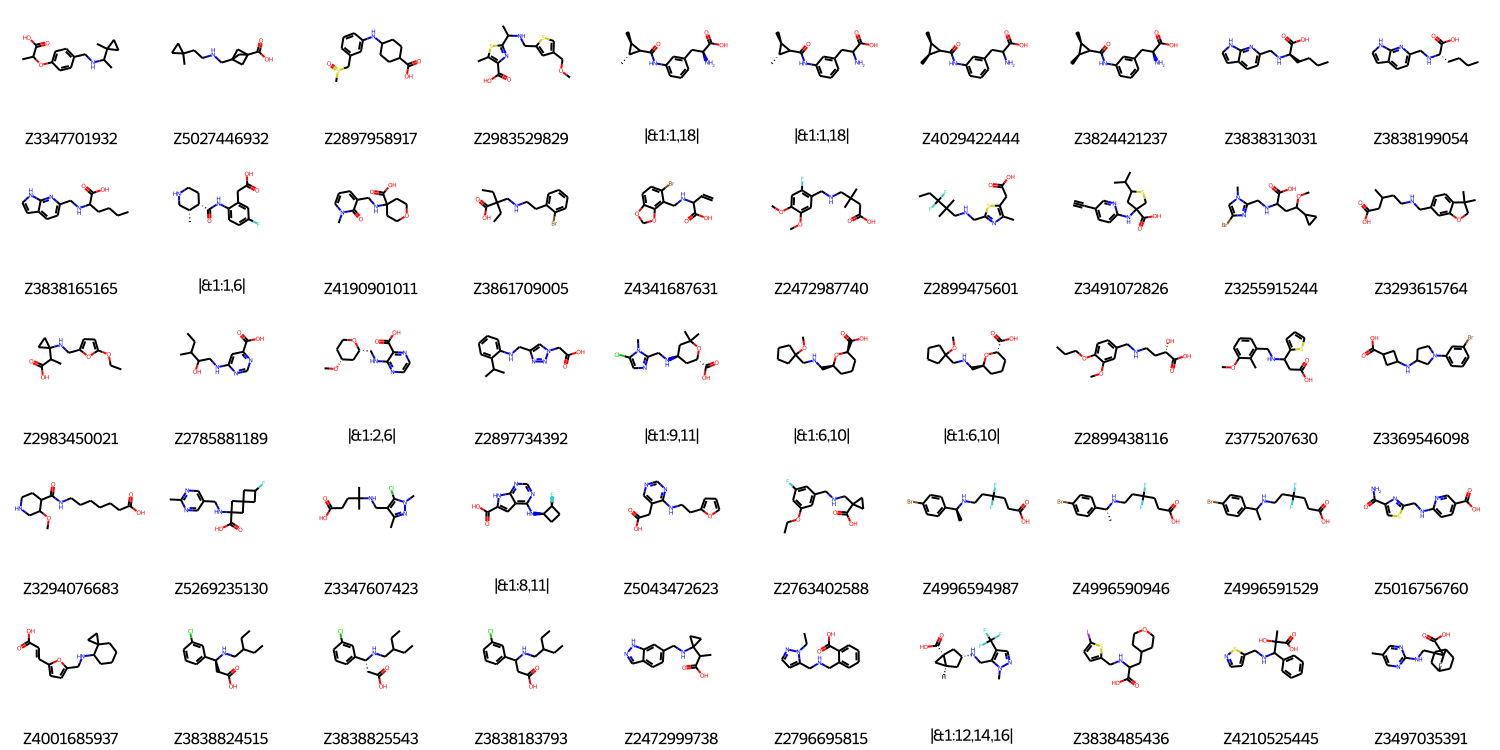

In [8]:
Draw.MolsToGridImage(working_library,molsPerRow=10,subImgSize=(150,150),legends=[mol.GetProp('_Name') for mol in working_library])

## 3.Getting the fingerprints for comparison

In [10]:
fps= [FingerprintMols.FingerprintMol(mol) for mol in working_library]

In [11]:
fps[0]

In [12]:
print(len(working_library))
print(len(fps))

100
100


In [ ]:
# compute similarity of each pair of molecules

In [13]:
DataStructs.FingerprintSimilarity(fps[0],fps[1])

0.3527777777777778

In [14]:
size=len(working_library)
hmap=np.empty(shape=(size,size))
table=pd.DataFrame()
for index, i in enumerate(fps):
    for jndex, j in enumerate(fps):
        similarity=DataStructs.FingerprintSimilarity(i,j)
        hmap[index,jndex]=similarity
        table.loc[working_library[index].GetProp('_Name'),working_library[jndex].GetProp('_Name')]=similarity

In [15]:
table.head(10)

,Z3347701932,Z5027446932,Z2897958917,Z2983529829,"|&1:1,18|",Z4029422444,Z3824421237,Z3838313031,Z3838199054,Z3838165165,...,Z3347674759,Z5012146335,Z4251135477,"|&1:3,6|",Z4313620326,Z5245582047,Z2353580282,Z3999468170,Z2568588973,Z4075899707
Z3347701932,1.000000,0.352778,0.283217,0.316261,0.306780,0.306780,0.306780,0.366987,0.366987,0.366987,...,0.337288,0.356140,0.424793,0.286944,0.311628,0.369181,0.454023,0.317647,0.344526,0.351964
Z5027446932,0.352778,1.000000,0.380556,0.368870,0.359897,0.359897,0.359897,0.382927,0.382927,0.382927,...,0.400524,0.312958,0.306977,0.392344,0.338061,0.366029,0.246875,0.359694,0.393103,0.327273
Z2897958917,0.283217,0.380556,1.000000,0.323308,0.458029,0.458029,0.458029,0.328808,0.328808,0.328808,...,0.296825,0.300325,0.304985,0.372404,0.320242,0.330816,0.376000,0.278740,0.336620,0.300000
Z2983529829,0.316261,0.368870,0.323308,1.000000,0.367960,0.367960,0.367960,0.412260,0.412260,0.412260,...,0.351582,0.346863,0.414576,0.218076,0.429621,0.387249,0.400424,0.348780,0.296647,0.239566
"|&1:1,18|",0.306780,0.359897,0.458029,0.367960,1.000000,1.000000,1.000000,0.338192,0.338192,0.338192,...,0.347003,0.317610,0.359238,0.370370,0.310791,0.318966,0.387342,0.322430,0.354396,0.327801
Z4029422444,0.306780,0.359897,0.458029,0.367960,1.000000,1.000000,1.000000,0.338192,0.338192,0.338192,...,0.347003,0.317610,0.359238,0.370370,0.310791,0.318966,0.387342,0.322430,0.354396,0.327801
Z3824421237,0.306780,0.359897,0.458029,0.367960,1.000000,1.000000,1.000000,0.338192,0.338192,0.338192,...,0.347003,0.317610,0.359238,0.370370,0.310791,0.318966,0.387342,0.322430,0.354396,0.327801
Z3838313031,0.366987,0.382927,0.328808,0.412260,0.338192,0.338192,0.338192,1.000000,1.000000,1.000000,...,0.376471,0.360947,0.423131,0.395722,0.377254,0.412429,0.412048,0.337644,0.433557,0.374670
Z3838199054,0.366987,0.382927,0.328808,0.412260,0.338192,0.338192,0.338192,1.000000,1.000000,1.000000,...,0.376471,0.360947,0.423131,0.395722,0.377254,0.412429,0.412048,0.337644,0.433557,0.374670
Z3838165165,0.366987,0.382927,0.328808,0.412260,0.338192,0.338192,0.338192,1.000000,1.000000,1.000000,...,0.376471,0.360947,0.423131,0.395722,0.377254,0.412429,0.412048,0.337644,0.433557,0.374670


## 4.hierarchical clustering
We can cluster our compound by similarity applying a linkage hierarchical clustering (HCL) analysis

In [16]:
linked = linkage(hmap,'single')
labelList = [mol.GetProp('_Name') for mol in working_library]

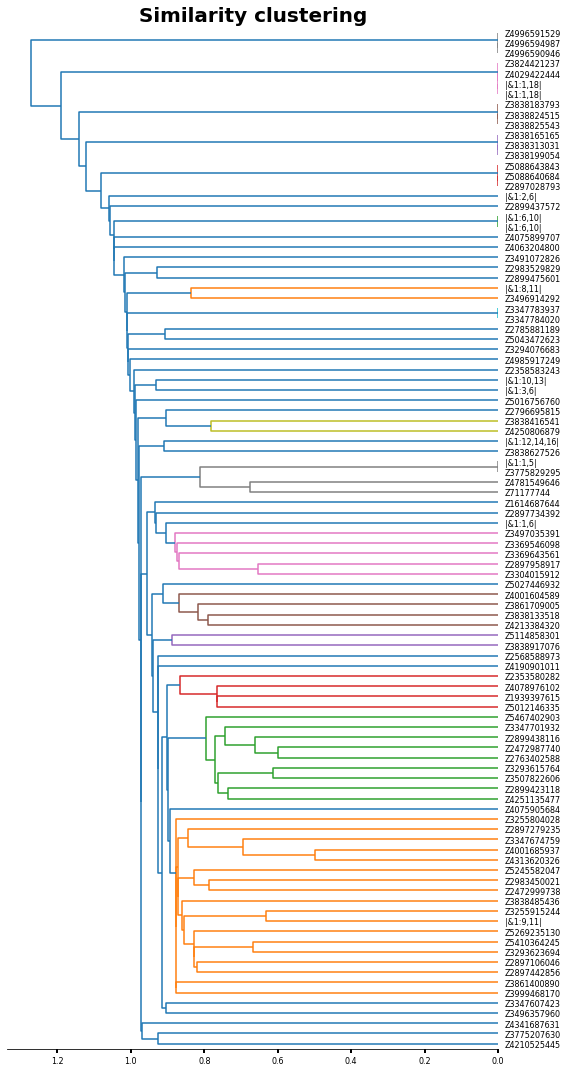

In [19]:
plt.figure(figsize=(8,15))

ax1=plt.subplot()
o=dendrogram(linked,  
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.title('Similarity clustering',fontsize=20,weight='bold')
plt.tick_params ('both',width=2,labelsize=8)
plt.tight_layout()
plt.show() 

In [20]:
# This will give us the clusters in order as the last plot
new_data=list(reversed(o['ivl']))

# we create a new table with the order of HCL
hmap_2=np.empty(shape=(size,size))
for index,i in enumerate(new_data):
    for jndex,j in enumerate(new_data):
        hmap_2[index,jndex]=table.loc[i].at[j]

[]

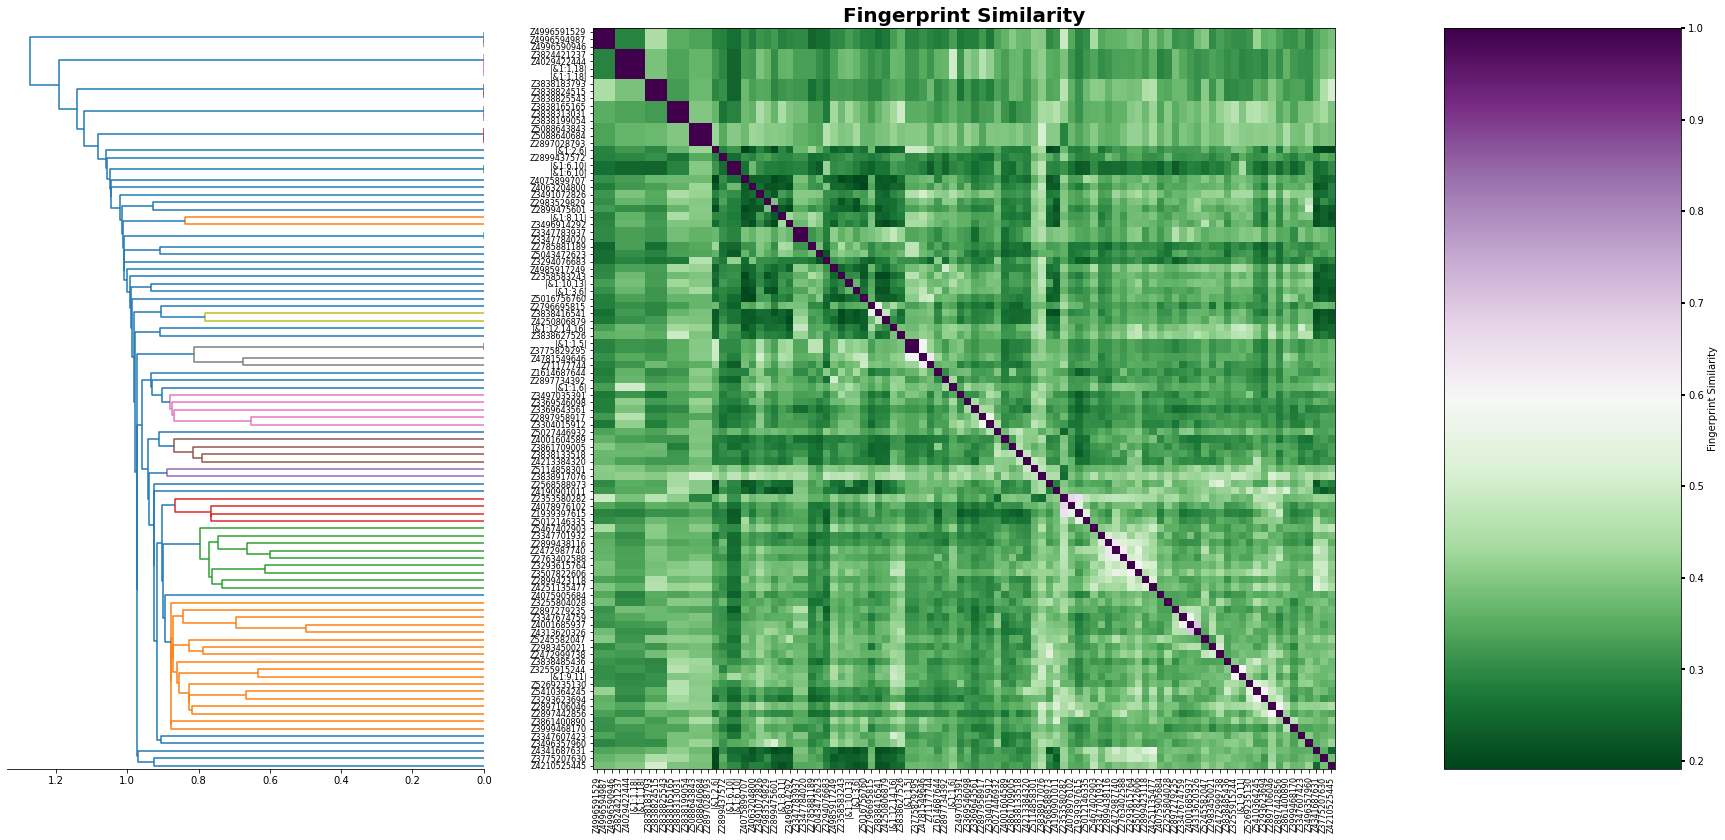

In [21]:
figure= plt.figure(figsize=(30,30))
gs1 = gridspec.GridSpec(2,7)
gs1.update(wspace=0.01)
ax1 = plt.subplot(gs1[0:-1, :2])
dendrogram(linked, orientation='left', distance_sort='descending',show_leaf_counts=True,no_labels=True)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = plt.subplot(gs1[0:-1,2:6])
f=ax2.imshow (hmap_2, cmap='PRGn_r', interpolation='nearest')

ax2.set_title('Fingerprint Similarity',fontsize=20,weight='bold')
ax2.set_xticks (range(len(new_data)))
ax2.set_yticks (range(len(new_data)))
ax2.set_xticklabels (new_data,rotation=90,size=8)
ax2.set_yticklabels (new_data,size=8)

ax3 = plt.subplot(gs1[0:-1,6:7])
m=plt.colorbar(f,cax=ax3,shrink=0.75,orientation='vertical',spacing='uniform',pad=0.01)
m.set_label ('Fingerprint Similarity')

plt.tick_params ('both',width=2)
plt.plot()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 2


【参考】
1. https://chem-workflows.com/articles/2019/06/28/similarity-analysis-of-compound-databases/